In [1]:
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\91998\Downloads\Multiple CSV\Multiple CSV\5.outlier.csv",header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [4]:
df.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [15]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

In [16]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

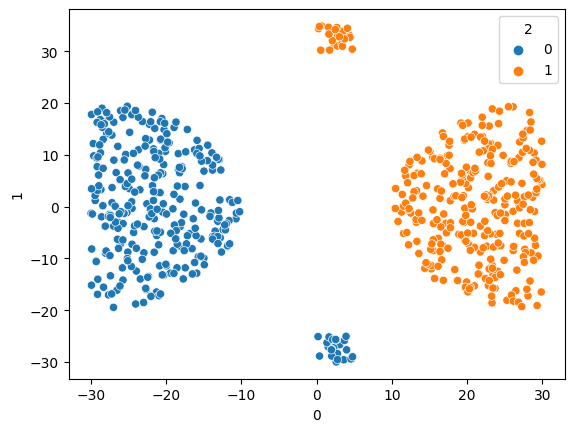

In [17]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

## Observation: As we see in the graph , this is linear relationship.

In [18]:
## Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [19]:
## Preprocessing train and test data
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [20]:
model=Sequential()
model.add(Dense(20,activation="relu",input_dim=2))
model.add(Dense(24,activation="relu"))
model.add(Dense(22,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 24)                504       
                                                                 
 dense_2 (Dense)             (None, 22)                550       
                                                                 
 dense_3 (Dense)             (None, 1)                 23        
                                                                 
Total params: 1137 (4.44 KB)
Trainable params: 1137 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
## Training the model
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=25,validation_split=0.1)

Epoch 1/25
98/98 [==============================] - 1s 5ms/step - loss: 0.1959 - accuracy: 0.9671 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 2/25
98/98 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 3/25
98/98 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/25
98/98 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/25
98/98 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 7.3830e-04 - val_accuracy: 1.0000
Epoch 6/25
98/98 [==============================] - 0s 2ms/step - loss: 8.0305e-04 - accuracy: 1.0000 - val_loss: 5.6606e-04 - val_accuracy: 1.0000
Epoch 7/25
98/98 [==============================] - 0s 3ms/step - loss: 6.3475e-04 - accuracy: 1.0000 - val_loss: 4.5855e-04 - val_accuracy: 1.0000


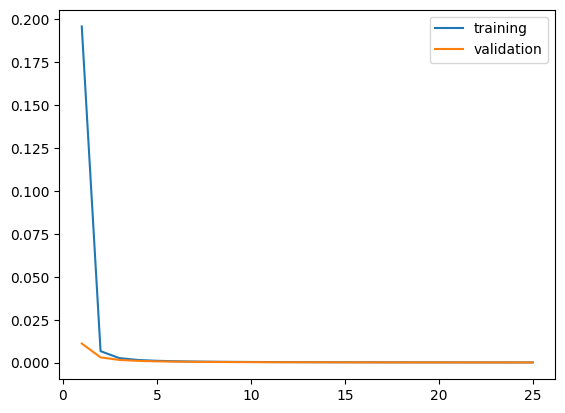

In [23]:
plt.plot(range(1,26),history.history["loss"],label="training")
plt.plot(range(1,26),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 11s 1ms/step


<Axes: >

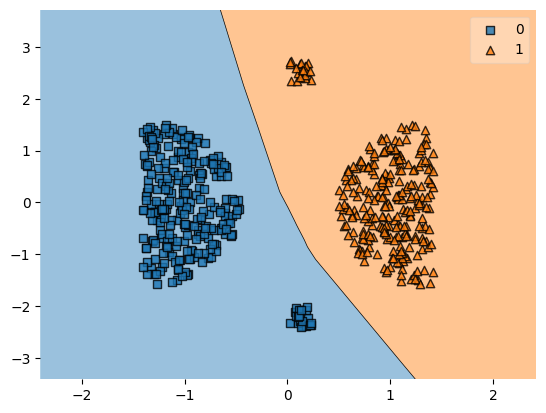

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_trainp,y_train.values,clf=model)

9600/9600 [==============================] - 11s 1ms/step


<Axes: >

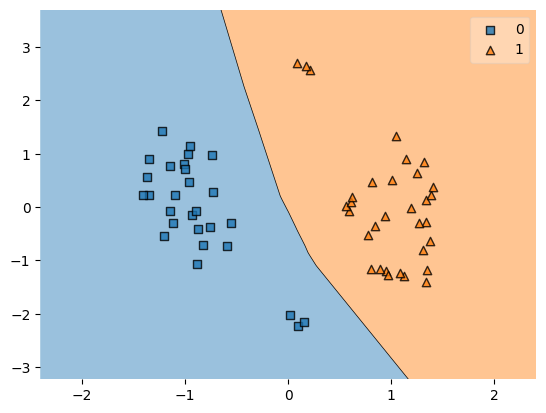

In [25]:
plot_decision_regions(x_testp,y_test.values,clf=model)